In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [78]:
# '시점' 컬럼에서 연도 추출
df['연도'] = df['시점'].apply(lambda x: int(x.split('.')[0]))

In [79]:
# '데이터' 컬럼을 백만 단위로 변환
df['데이터(백만)'] = df['데이터']

In [80]:
pivot = pd.pivot_table(df, 
                       values='데이터(백만)', 
                       index='국가(대륙)별', 
                       columns='연도', 
                       aggfunc='sum')

In [82]:
print(pivot)

연도            2017    2018    2019    2020    2021    2022
국가(대륙)별                                                   
기타           41571   36141   40950   44438   57959   19501
대양주          18989   17520   13191   16255   16841    5044
미국          142292  156312  186617  255384  277579  103416
아세안(ASEAN)   66163   76450   82930  105360   94150   38072
유럽연합(EU)     31068   36826   39008   39865   32349    9019
일본          125442  178094  189330  220730  280029  131771
중국          167240  182068  210418  289446  194380   98572
중남미          10245   11669   12981   12563    8298    2629
중동            8030    8019    9325   11467    6164    1389


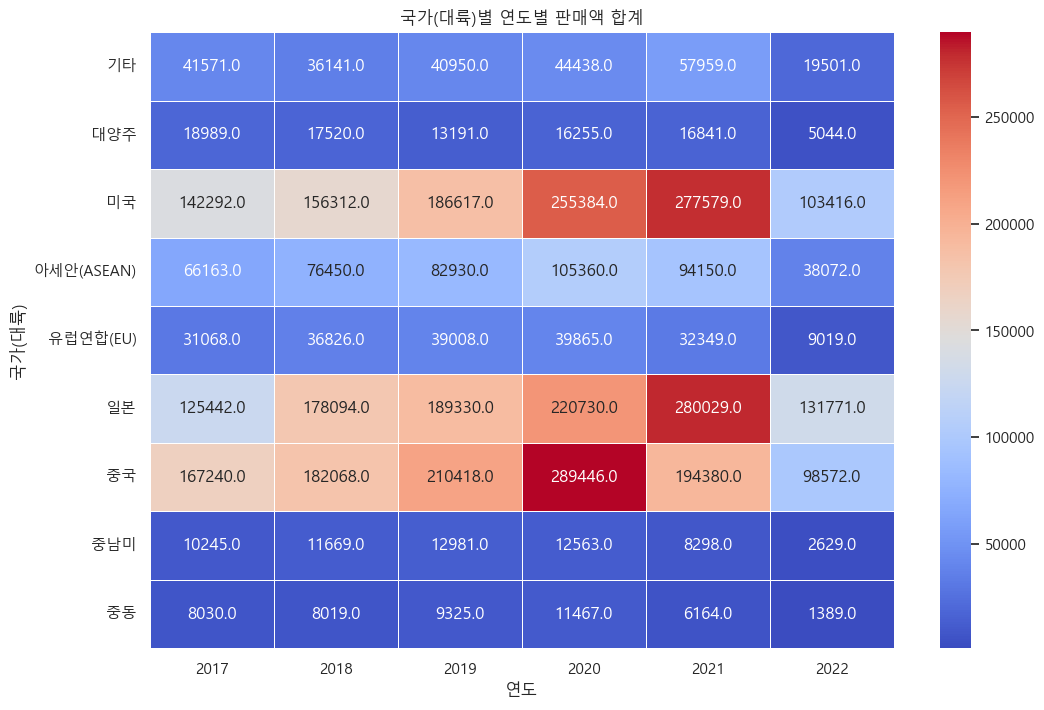

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.xlabel('연도')
plt.ylabel('국가(대륙)')
plt.show()